# ASTR-589 HW3

## Question 1

### Part A

We can define the Saha equation to output the ionization ratio times the electron number density.

In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import k_B, c, m_e, h, b_wien, e, sigma_T
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from decimal import *

In [2]:
def saha_ne(T, chi, g0=2, g1=1):
    '''
    Saha equation in terms of ionization ratio times electron number density. To convert to ionization fraction divide by electron number density and 
    '''
    power = (2 * np.pi * m_e * k_B * T / h**2 ) ** (3/2)
    # BP Calculating the first term of the saha equation.
    degen = 2 * g1 / g0
    # BP Calculating the second term of the saha equation.
    expon = np.exp(-chi / (T * k_B))
    # BP Calculating the Boltzmann term of the saha equation.
    
    return (power * degen * expon).cgs

For our hydrogen, the output is simply

In [3]:
T = 8.8e7*u.K
# BP Defining temperature of the gas.
S_H = saha_ne(T, 13.54*u.eV, g0=2, g1=1)
# BP Calculating the ionization ratio times the electron density for hydrogen.
print('The Saha equation for Hydrogen gives {:.3e}'.format(S_H))

The Saha equation for Hydrogen gives 1.990e+27 1 / cm3


The same can be done for the two ionization states of Helium.

In [4]:
S_He1 = saha_ne(T, 24.48*u.eV, g0=2, g1=4)
S_He2 = saha_ne(T, 54.17*u.eV, g0=4, g1=1)
# BP Calculating the ionization ratios times the electron density for helium.
print('The Saha equation for the first ionization of Helium gives {:.3e}'.format(S_He1))
print('The Saha equation for the second ionization of Helium gives {:.3e}'.format(S_He2))

The Saha equation for the first ionization of Helium gives 7.948e+27 1 / cm3
The Saha equation for the second ionization of Helium gives 9.896e+26 1 / cm3


In [5]:
S_He = S_He1 * S_He2
print('The combination of the two gives {:.3e}'.format(S_He))

The combination of the two gives 7.865e+54 1 / cm6


Using the results from part b, we can calculate the actual ionization ratios.

In [21]:
S_H_r = S_H / n_e
print('The ratio of singly ionized hydrogen to ground state hydrogen is {:.3e}.'.format(S_H_r))

The ratio of singly ionized hydrogen to ground state hydrogen is 2.132e+31.


In [22]:
S_He_r = S_He / n_e**2
print('The ratio of doubly ionized helium to ground state helium. is {:.3e}.'.format(S_H_r))

The ratio of doubly ionized helium to ground state helium. is 2.132e+31.


### Part b

The average frequency photon produced by an electron at temperature $T$ is

In [23]:
nu_ave = (3 * k_B * T) / (2 * h)
print('The average frequency photon produced is {:.3e}'.format(nu_ave))

The average frequency photon produced is 2.750e+18 1 / s


The high frequency cutoff defined in the derivation is similarly

In [24]:
nu_cutoff = k_B * T / h
print('The upper frequency cutoff is {:.3e}'.format(nu_cutoff))

The upper frequency cutoff is 1.834e+18 1 / s


From the homework derivation, we know the emission from the gas is purely thermal Bremsstrahlung. Using our knowledge about ionization states and 

In [8]:
def elec_from_brem(T, Lx, R, g_B):
    '''
    Calculates the average electron density in an optically thin gas homogenously distributed about a sphere of radius R.
    Assumes measured X-ray luminosity is all from thermal Bremsstrahlung integrated over frequency.
    This takes into account a mass fraction of 3:1 for a combination of fully ionized hydrogen and helium.
    '''
    power = (3 * m_e) / (2 * np.pi * k_B * T)
    factor = (117 * h * m_e * c**3) / (1792 * R**3 * np.pi**2 * e.esu**6 * g_B)
    ne = np.sqrt(Lx * np.sqrt(power) * factor)
    
    return ne.cgs

In [9]:
Lx = 5e44 * u.erg / u.s
R = 3*u.Mpc
g_B = 1.2
# BP Defining paramters from problem description.

In [10]:
n_e = elec_from_brem(T, Lx, R, g_B)
print('The calculated average electron density is {:.3e}'.format(n_e))

The calculated average electron density is 9.331e-05 1 / cm3


### Part c

The derived equation for the optical depth can be defined to solve for the roots.

In [11]:
def opt_dept_brem(nu, T, R, n_e, g_B):
    '''
    Calculates the optical depth of a cloud of electrons from both bremsstrahlung and thomson electron scattering. Inputs must be astropy quantities and CANNOT be array-like. 
    Each evaluation takes non-negligible time due to precision 
    '''
    from astropy.constants import k_B, c, m_e, h, b_wien, e, sigma_T
    
    getcontext().prec = 40

    nu_dec = Decimal(u.Quantity(nu, u.Hz).cgs.value)
    k_B_dec = Decimal(k_B.cgs.value)
    e_dec = Decimal(e.esu.value)
    m_e_dec = Decimal(m_e.cgs.value)
    h_dec = Decimal(h.cgs.value)
    c_dec = Decimal(c.cgs.value)
    sigma_T_dec = Decimal(sigma_T.cgs.value)
    T_dec = Decimal(T.cgs.value)
    n_e_dec = Decimal(n_e.cgs.value)
    g_B_dec = Decimal(g_B)
    R_dec = Decimal(R.cgs.value)

    brem1 = (Decimal(56) * e_dec**Decimal(6)) / (Decimal(39) * m_e_dec * h_dec * c_dec)
    brem2 = (Decimal(2) * Decimal(np.pi)) / (Decimal(3) * k_B_dec * m_e_dec)
    brem3 = n_e_dec**Decimal(2) * g_B_dec / (T_dec**Decimal(0.5))
    brem4 = Decimal(1) - Decimal(-(h_dec * nu_dec) / (k_B_dec * T_dec)).exp()
    
    prefac = brem1 * brem2**Decimal(0.5) * brem3
    brem = prefac / Decimal(nu_dec**Decimal(3)) * brem4
    
    thom = sigma_T_dec * n_e_dec
    
    #print(R.cgs*prefac.cgs, R.cgs*thom.cgs)
    
    return R_dec * (brem + thom)

In [12]:
def opt_dept_brem_RJ(nu, T, R, n_e, g_B):
    nu = u.Quantity(nu, u.Hz)
    brem1 = (56 * e.esu**6) / (39 * m_e * k_B * c)
    brem2 = (2 * np.pi) / (3 * k_B * m_e)
    brem3 = n_e**2 * g_B / (T**1.5)
    
    prefac = brem1 * brem2**0.5 * brem3
    brem = prefac / nu**2
    
    thom = sigma_T * n_e
    
    return (R * (brem + thom)).cgs

In [13]:
func = lambda nu: opt_dept_brem_RJ(nu, T, R, n_e, g_B) - 1
nu_cutoff = fsolve(func, 45) * u.Hz
print(nu_cutoff)

[47.29949964] Hz


In [14]:
nus = np.logspace(0, 20, 1000)*u.Hz
taus = []
for nu in nus:
    taus.append(opt_dept_brem(nu, T, R, n_e, g_B))

In [15]:
plt.rc('axes', labelsize=14)
plt.rc('figure', titlesize=30)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
# BP Stylization parameters.

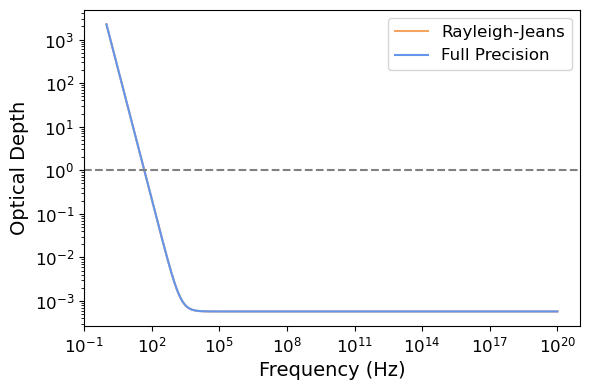

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), layout='tight')

ax.plot(nus, opt_dept_brem_RJ(nus, T, R, n_e, g_B), label = 'Rayleigh-Jeans', color='sandybrown')
ax.plot(nus, taus, label='Full Precision', color = 'cornflowerblue')
ax.axhline(1, color = 'grey', ls = '--')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'upper right')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Optical Depth')
plt.savefig('/home/baparker/GitHub/Coursework/ASTR-589/HW/HW3/HW3_1_c.png')

In [17]:
nus = np.linspace(47, 48, 10000)*u.Hz
taus = []
for nu in nus:
    taus.append(opt_dept_brem(nu, T, R, n_e, g_B))

In [18]:
nus[np.where(np.array(taus)>1)[0][-1]]

<Quantity 47.29942994 Hz>

### Part d

The total cooling time is simply the stored energy divided by the luminosity.

In [19]:
t_cool = (12 * k_B * T * n_e * np.pi * R**3) / (6 * Lx)
print('The cooling time for the cluster is {:.3e}, or {:.3f}'.format(t_cool.cgs,t_cool.to(u.Gyr)))

The cooling time for the cluster is 1.130e+19 s, or 358.117 Gyr
